# Q1
## Goal = Do descriptive and graphical analysis and find optimal number of cluster

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import pylab as pl
from pylab import rcParams 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15,10

## _Import data_

In [3]:
fileLoc = 'C:/Users/lco73/Desktop/PreScreen_r3/ingredient.csv'
data = pd.read_csv(fileLoc)
print("First 5 example of data")
data.head()

First 5 example of data


a      b     c     d      e     f      g     h     i
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
1  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00

## _Statistical Summary_

In [4]:
data.describe() 

a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%      8.600000    0.000000    0.000000  
75%      9.172500    0.000000    0.100000  
max     16.190000    3.150000    0.510000

#### Findings: 
1. The standard deviation for additives 'a' and 'i' are low. 
2. No dependant variable specified, ANOVA is not required

In [5]:
#Check for missing Values
print(data.isna().sum())

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64


#### Finding: 
No missing value

### Histogram

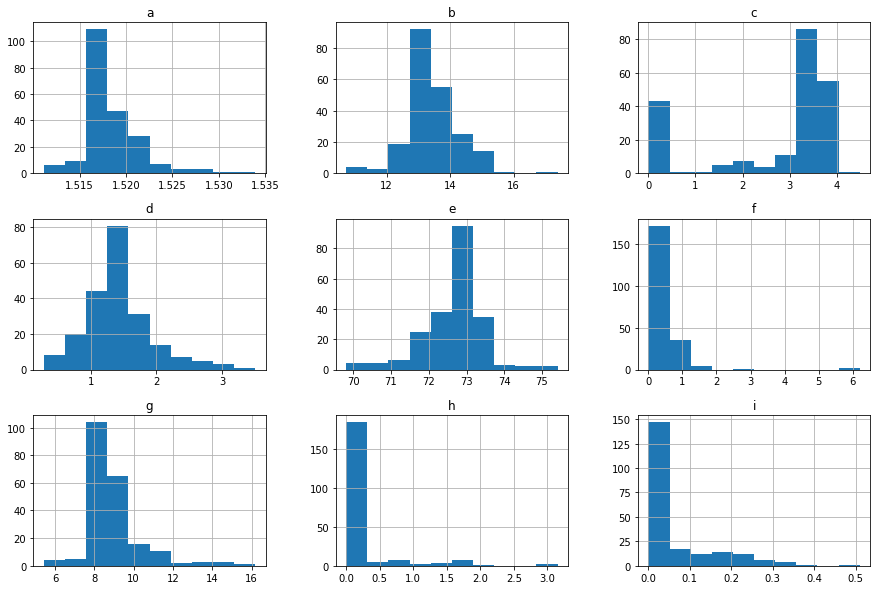

a    1.625431
b    0.454181
c   -1.152559
d    0.907290
e   -0.730447
f    6.551648
g    2.047054
h    3.416425
i    1.754327
dtype: float64

In [6]:
#plot data distribution
data.hist()
plt.show()
#check skewness
data.skew()

#### Findings: 
1. Additives 'a', 'd', 'f' and 'g' are right-skewed
2. Additive 'e' is left-skewed.
3. Additive 'c' is bi-modal
4. Additives 'f', 'h', 'i' are zero-inflated

### Box plot

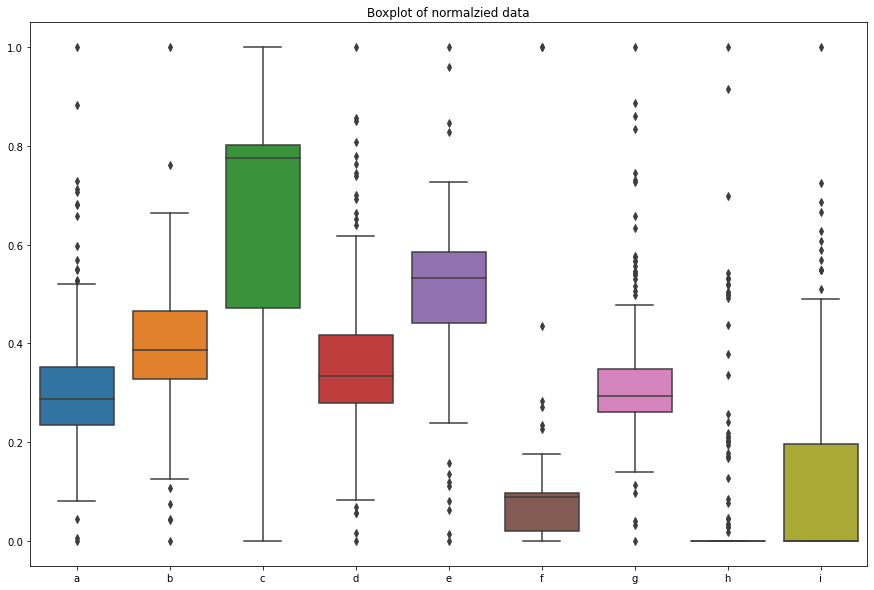

In [7]:
scaler = MinMaxScaler()
# normalize data
data_norm = pd.DataFrame(scaler.fit_transform(data),columns=['a', 'b', 'c','d','e','f','g','h','i'])

sns.boxplot(data=data_norm)
plt.title('Boxplot of normalzied data')
plt.show()

#### Findings:
All attributes have outliers except 'c'.
Data in 'h' are all shown as outliers since it is heavily zero inflated.
There isn't a need to remove outliers since these data are specifically formulated additives combination that is not caused by any form of measurement errors.

## _Correlation analysis_

### Correlation Matrix

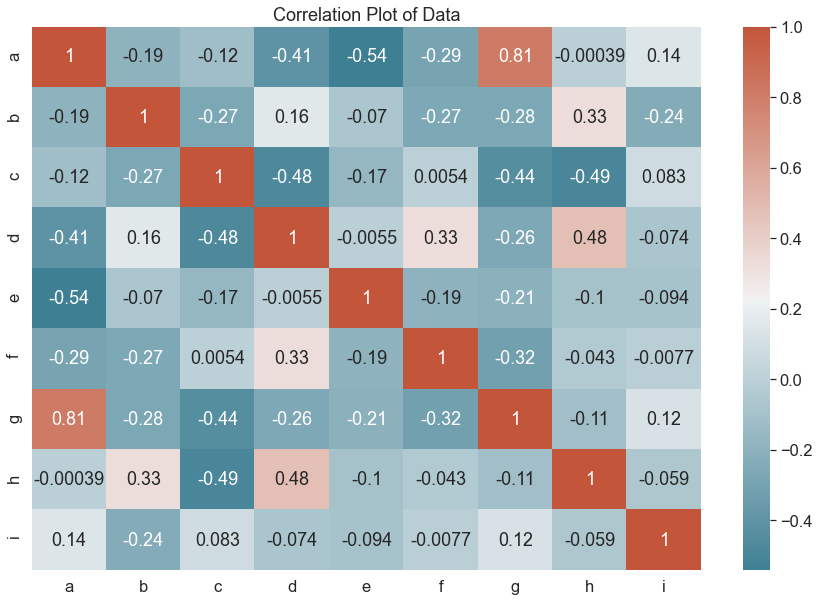

In [8]:
corr = data.corr()
sns.set(font_scale=1.5) 
plt.subplots()
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Plot of Data')
plt.show()

#### Findings: 
The correlation between additives 'a' and 'g' is very high at 0.81


### Correlation pairplot

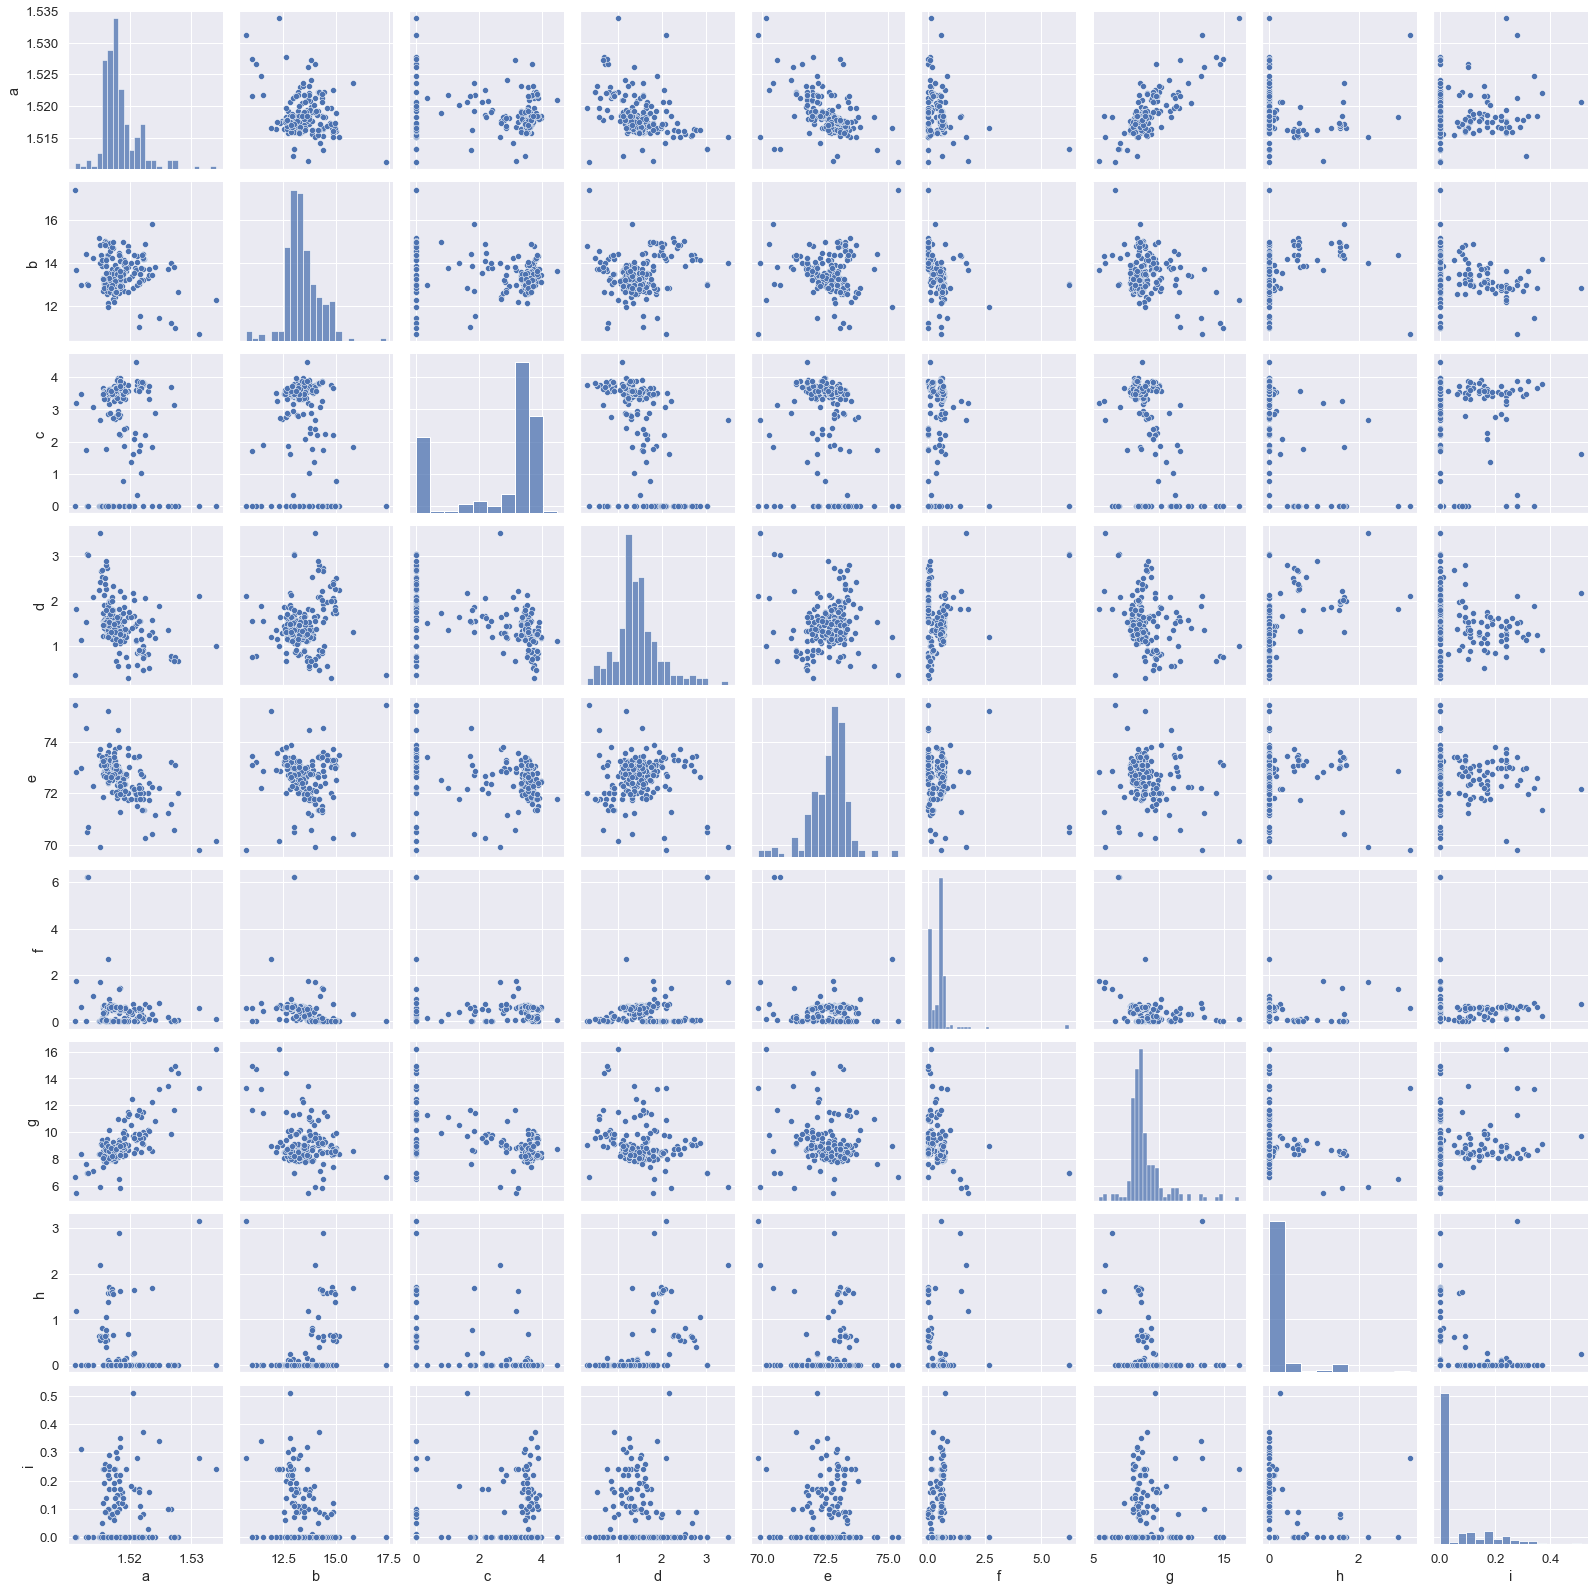

In [9]:
sns.set(font_scale=1.2) 
sns.pairplot(data)
plt.show()

## _Clustering_

### Affinity Propagation

In [10]:
scaler = MinMaxScaler()
# normalize transformed data
train_data = pd.DataFrame(scaler.fit_transform(data),columns=['a', 'b', 'c','d','e','f','g','h','i'])
train_data.describe()

a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.316744    0.402684    0.597891    0.359784    0.507310    0.080041   
std      0.133313    0.122798    0.321249    0.155536    0.138312    0.105023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.235843    0.327444    0.471047    0.280374    0.441071    0.019726   
50%      0.286655    0.386466    0.775056    0.333333    0.532143    0.089372   
75%      0.351514    0.465414    0.801782    0.417445    0.585268    0.098229   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     0.327785    0.055570    0.111783  
std      0.132263    0.157847    0.191056  
min      0.000000    0.000000    0.000000  
25%      0.261152    0.000000    0.000000  
50%      0.294610    0.000000    0.000000  
75%      0.347816    0.000000    0.196078  
max      1.000000    1.000000    1.000000

In [11]:
clt = AffinityPropagation(damping=0.93, max_iter=200, affinity="euclidean", random_state = None)
model = clt.fit(train_data)
n_clustersAP = len(model.cluster_centers_indices_)
print("Number of Clusters: ",n_clustersAP, '\nCluster Label:', set(model.labels_))

Number of Clusters:  5 
Cluster Label: {0, 1, 2, 3, 4}


In [12]:
clusters = pd.DataFrame(model.fit_predict(train_data))
APdata=data
APdata["Cluster"] = clusters

fig = px.scatter_3d(APdata, x="a", y='i', z='g',color='Cluster', 
                    title = "The 5 clusters visualized using additives 'a', 'g' and 'i'")
fig.show()

#### Finding:
The number of cluster found using affinity propagation is 5. However, there is only one data row with the cluster label '0'.

### Agglomerative clustering

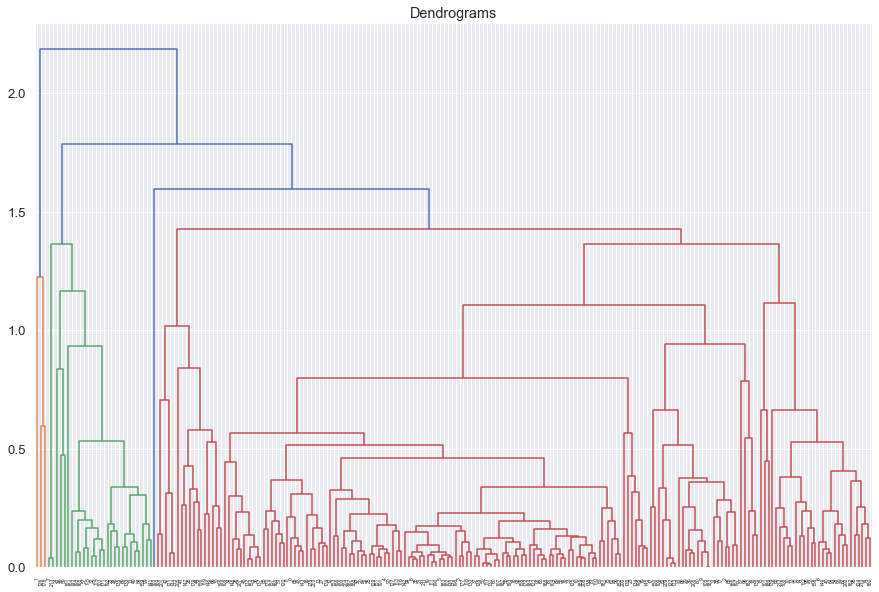

In [13]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(train_data, method='complete'))

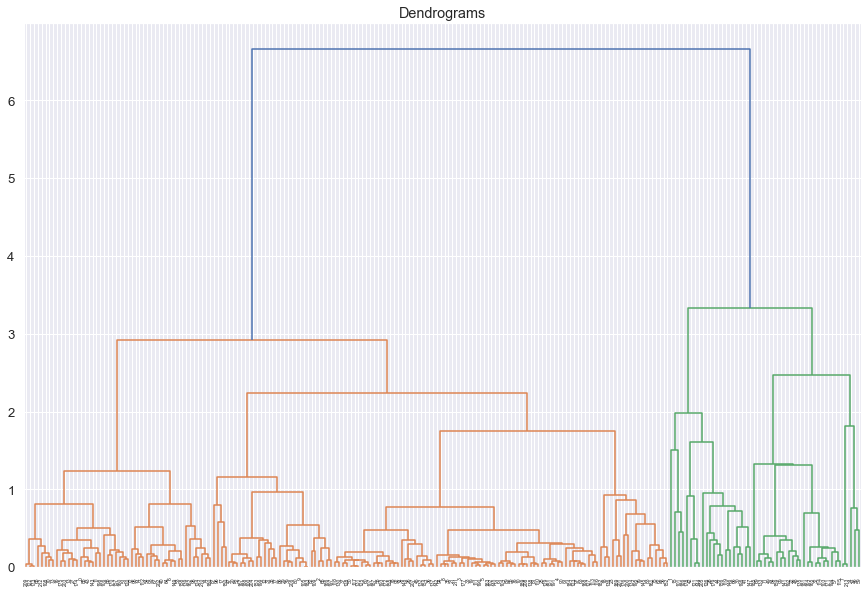

In [14]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(train_data, method='ward'))

#### Findings:
The number of cluster found using Dendograms using complete and ward linkage are 4 and 3, respectively.

### Gaussian Mixture Clustering

C:\Users\lco73\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



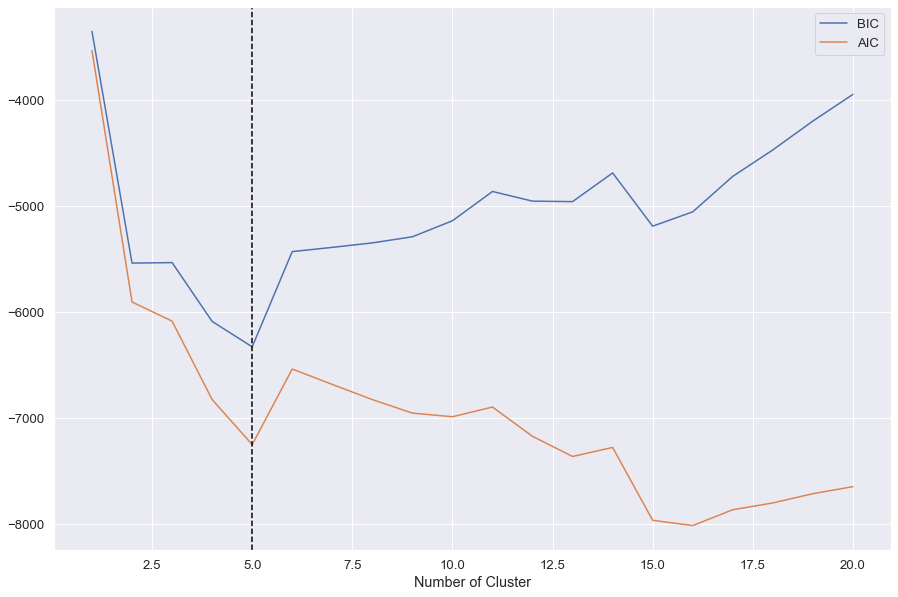

In [15]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(train_data) for n in n_components]
fig,ax = plt.subplots()
plt.plot(n_components, [m.bic(train_data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.axvline(x=5, c='black',linestyle='--')
plt.xlabel('Number of Cluster');

#### Findings: 
Using full covariance constraint, the optimal number of cluster determined is 5 when using both the Akaike information criterion (AIC) and the Bayesian information criterion (BIC).

### K mean Clustering

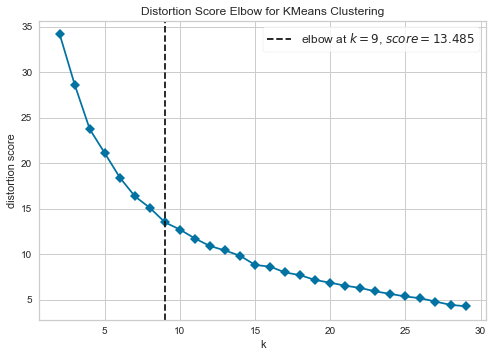

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Elbow Method for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= False)
visualizer.fit(train_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#### Findings: 
The optimal cluster found using the elbow method is 9

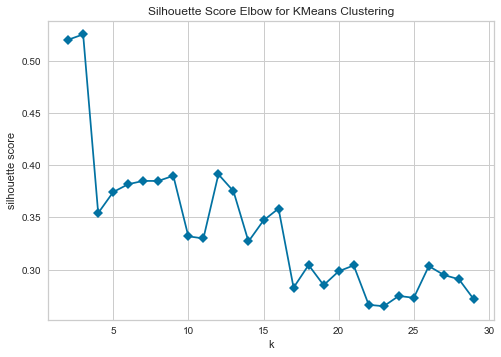

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# Silhouette Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(train_data)
visualizer.show() 

#### Findings: 
The optimal cluster found using the silhouette score is 3 (Highest score)

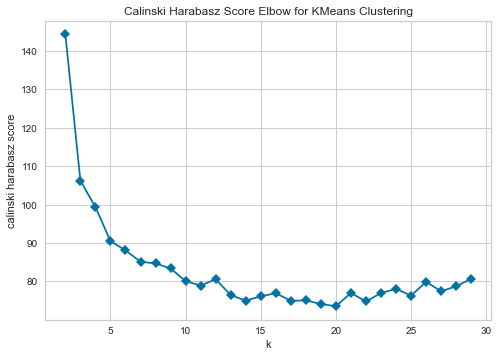

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
# Calinski Harabasz Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(train_data) 
visualizer.show()

#### Findings: 
The optimal cluster found using the silhouette score is 2 (Highest score)

## Conclusion
Based on all the clustering methods used to determine the optimal cluster number, the most appropriate cluster number to be used is 4 (averaged among methods)